# Velocity

This notebook shows an analysis of the physical characteristics of the fjord to locate potential locations for the release. Velocity vectors u and v are loaded in and wind speed is calculated. Transects and 2D vector plots for various depths provide an overview of the physical characteristics of the fjord. The analysis is primarily based on a 100 m resolution model output for the summer months of 2012.

The modules needed are as follows (note a regridding tool is used):


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import xrscipy
import numpy as np
import cartopy.crs as ccrs
import xesmf as xe
from matplotlib import colorbar, colors
from matplotlib.cm import get_cmap
from roms_regrid import *
from density import *

## Loading and regridding data

In [2]:
x=xr.open_mfdataset('/expanse/lustre/projects/cos100/uheede/roms/run/Iceland3/z_data/july/z_Iceland3_rnd.201207*.nc', combine='nested', concat_dim=["time"])
#x=xr.open_mfdataset('/expanse/lustre/projects/cos100/uheede/roms/run/Iceland3/Iceland3_rnd.20120516130000.nc', combine='nested', concat_dim=["time"])

x=x.mean('time')
grid=xr.open_mfdataset('/expanse/lustre/projects/cos100/uheede/Iceland3_grd.nc')
u=x['u']
v=x['v']


u=roms_regrid_u(grid,u)
v=roms_regrid_v(grid,v)
u=u.isel(lon=slice(0,721))
v=v.isel(lat=slice(0,721))
v=v.assign_coords(lon=u.lon)
v=v.assign_coords(lat=u.lat)
u2=u**2
v2=v**2
speed=(u2+v2)**(1/2)
u=u.where(u != 0)
v=v.where(v != 0)

/home/uheede/.conda/envs/xarray_new/lib/python3.10/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [3]:
speed.load()

<xarray.DataArray (depth: 34, lat: 721, lon: 721)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.04528379, 0.04635854, ..., 0.        ,
         0.        , 0.        ],
        [0.        ,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [0.        ,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.        ,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        ,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.        ,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)
Coordinates:
  * depth    (depth) float32 -0.0 -1.0 -2.0 -3.0 ... -220.0 -240.0 -260.0 -280.0
  * lon      (lon) float64 337.2 337.2 337.2 337.2 ... 338.7 338.7 338.7 338.7
  * lat      (lat) float64 63.92 63.92 63.93 63.93 ... 64.57 64.57 64.57 64.57

In [4]:
u.load()

<xarray.DataArray (depth: 34, lat: 721, lon: 721)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan, -0.04505319, -0.04621315, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * depth    (depth) float32 -0.0 -1.0 -2.0 -3.0 ... -220.0 -240.0 -260.0 -280.0
  * lon      (lon) float64 337.2 337.2 337.2 337.2 ... 338.7 338.7 338.7 338.7
  * lat      (lat) float64 63.92 63.92 63.93 63.93 ... 64.57 64.57 64.57 64.57
Attributes:
    regrid_method:  bilinear

In [5]:
v.load()

<xarray.DataArray (depth: 34, lat: 721, lon: 721)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan, -0.00456418, -0.00366862, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * depth    (depth) float32 -0.0 -1.0 -2.0 -3.0 ... -220.0 -240.0 -260.0 -280.0
  * lon      (lon) float64 337.2 337.2 337.2 337.2 ... 338.7 338.7 338.7 338.7
  * lat      (lat) float64 63.92 63.92 63.93 63.93 ... 64.57 64.57 64.57 64.57
Attributes:
    regrid_method:  bilinear

## Velocity Vector Plots

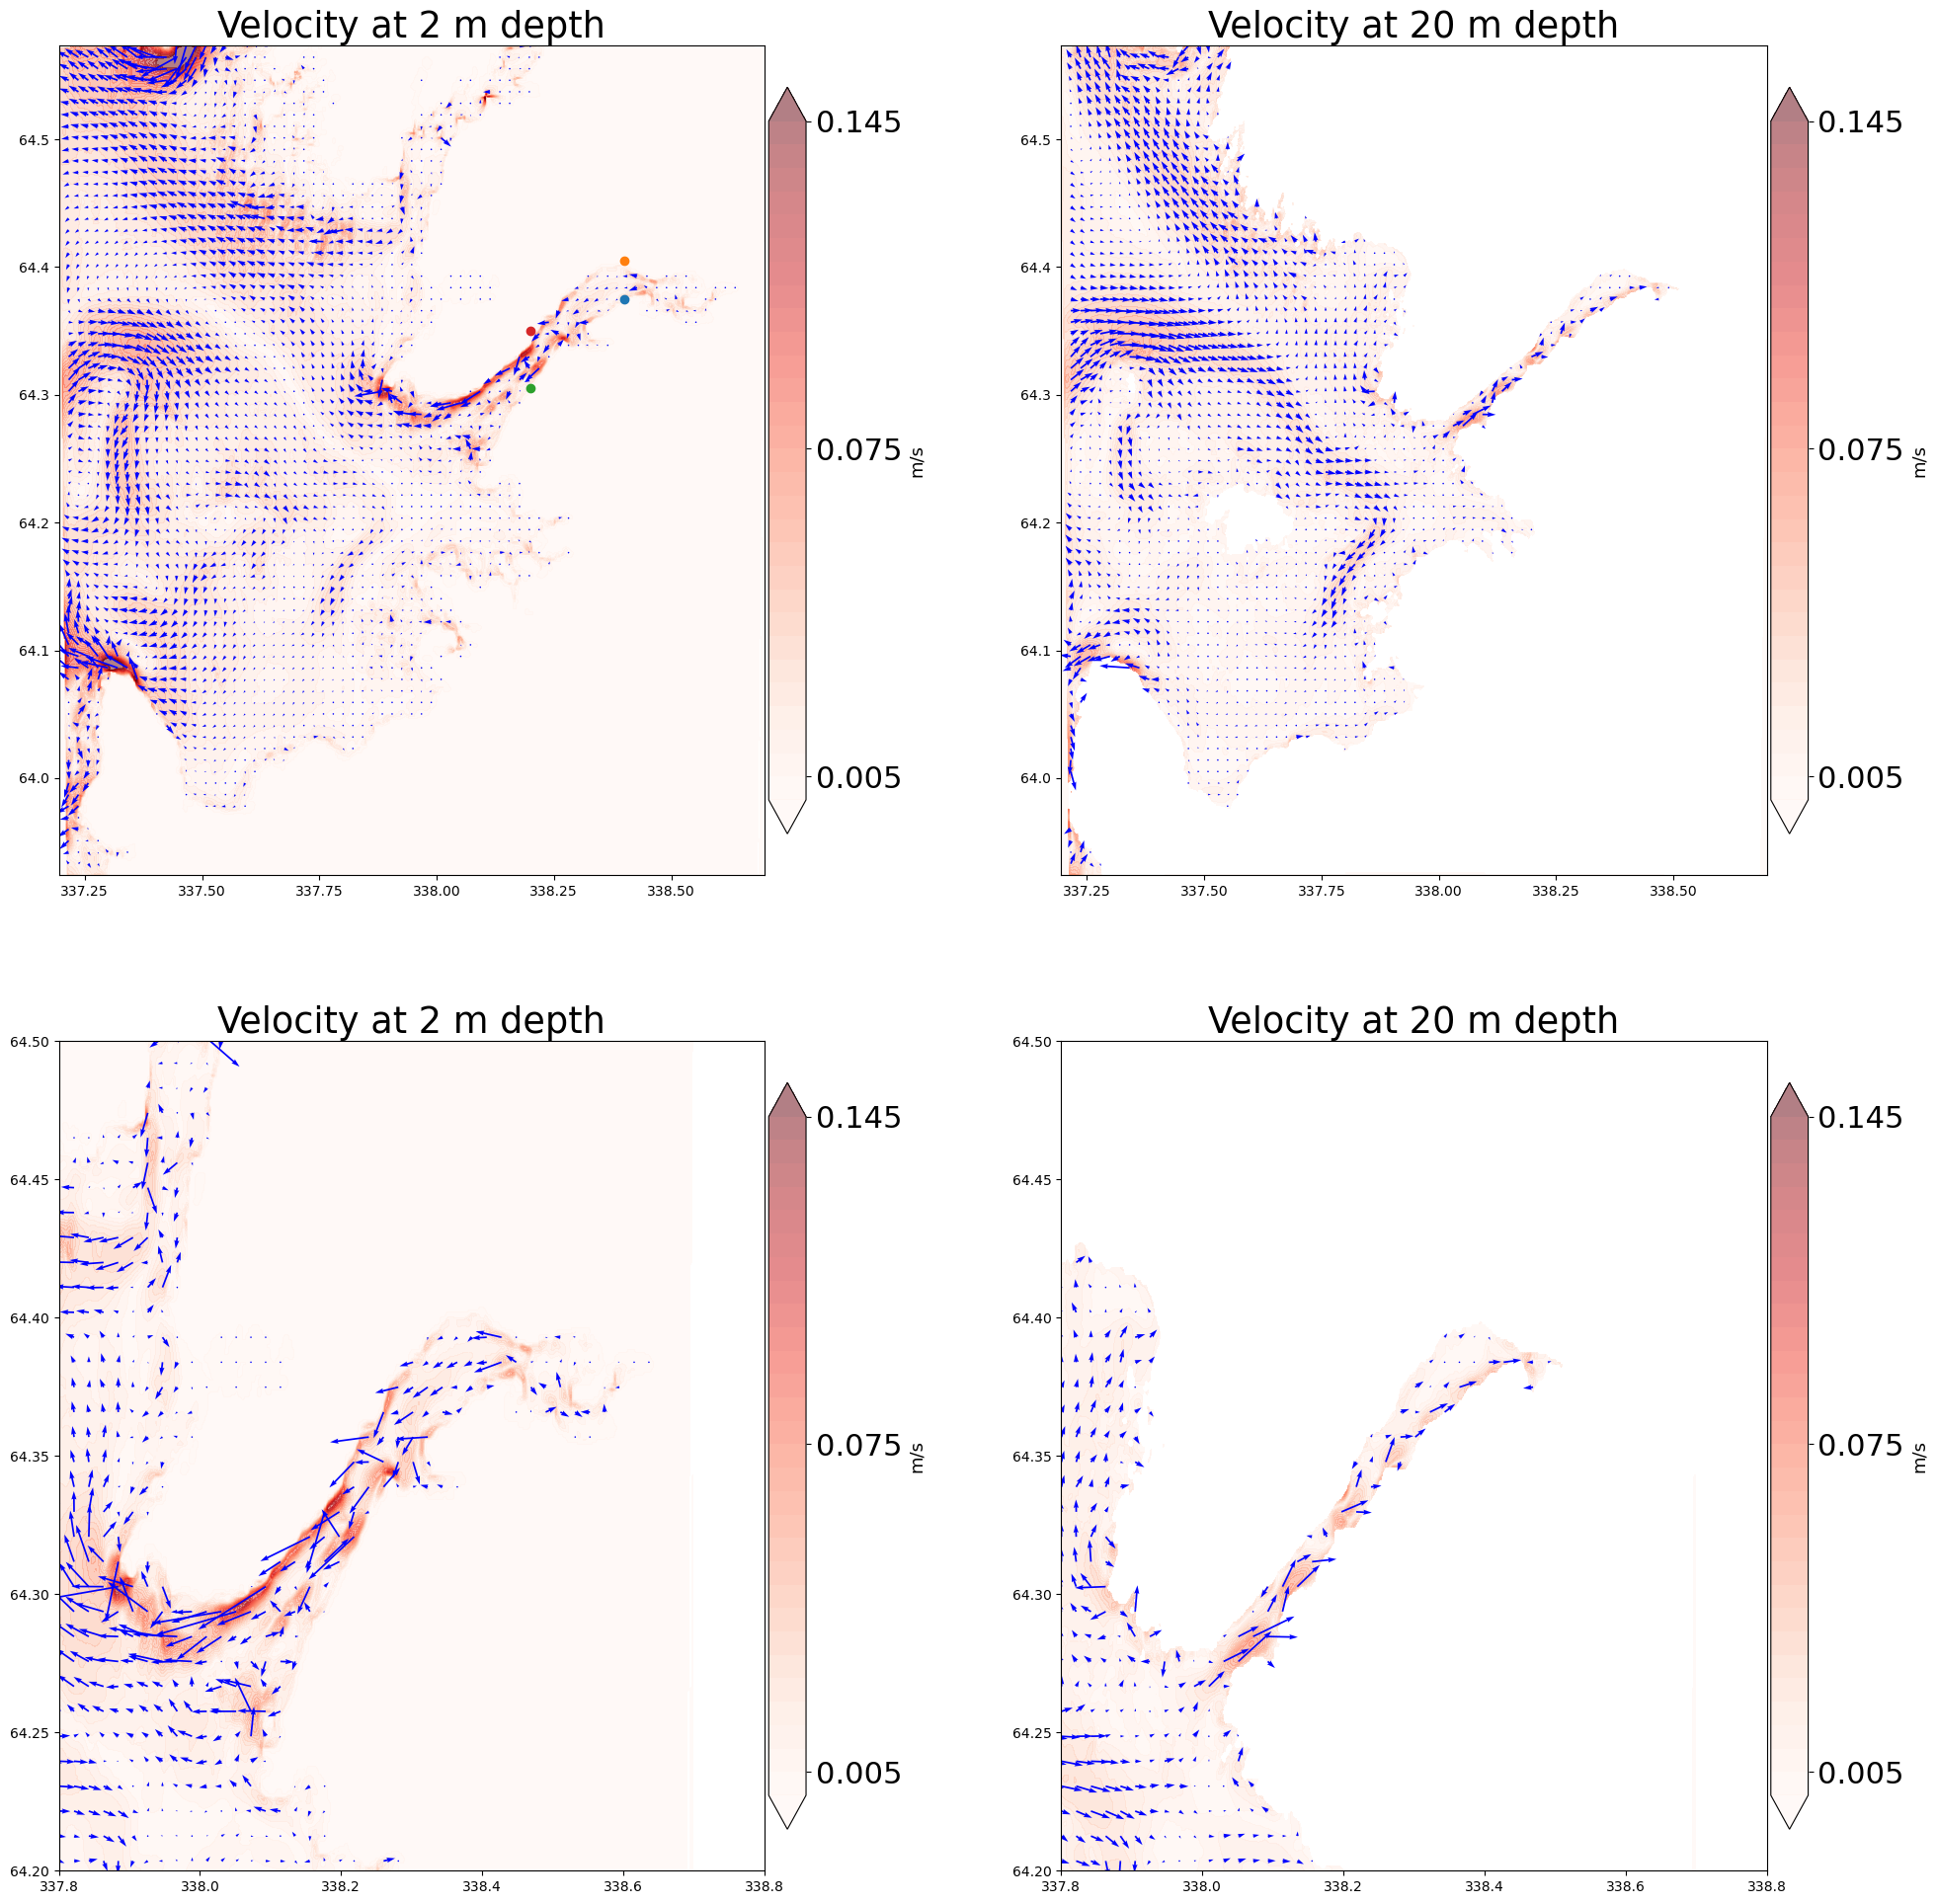

In [6]:
#plt.contourf(den.sel(depth=100,method='nearest'))
from matplotlib.collections import LineCollection
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(8*3, 8*3))
axlist = axarr.flatten()
k1=0
k2=0.15
k3=0.005

#k1=5
#k2=10
#k3=0.5

#k3=0.5
plt.rcParams['hatch.linewidth'] = 0.4
levels = np.arange(k1, k2, k3)
cmap = 'Reds'
cmap2 = 'BrBG'

lat1=64.375
lat2=64.405
lon1=338.4
lon2=338.4
lat3=64.305
lat4=64.35
lon3=338.2
lon4=338.2
plt.rcParams.update({'font.size': 22})

cf1=axlist[0].contourf(speed.lon,speed.lat,speed.sel(depth=-2),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2,alpha=0.5)

cf2=axlist[0].quiver(v.lon[::10],u.lat[::10],u.sel(depth=-2)[::10,::10],v.sel(depth=-2)[::10,::10],color='blue')
cb1 = fig.colorbar(cf1, ax=axlist[0], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
cb1.set_label('m/s', fontsize=13)
axlist[0].plot(lon1, lat1, marker="o", ls="")
axlist[0].plot(lon2, lat2, marker="o", ls="")
axlist[0].plot(lon3, lat3, marker="o", ls="")
axlist[0].plot(lon4, lat4, marker="o", ls="")
axlist[0].set_title('Velocity at 2 m depth')

#pts = np.c_[lon1, lat1,lon1,lon1].reshape(len(lon1), 2, 2)
#axlist[0].add_collection(LineCollection(pts, color="crimson", label="Lines"))

cf1=axlist[1].contourf(speed.lon,speed.lat,speed.sel(depth=-20),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2,alpha=0.5)
cf2=axlist[1].quiver(v.lon[::10],u.lat[::10],u.sel(depth=-20,method='nearest')[::10,::10],v.sel(depth=-20,method='nearest')[::10,::10],color='blue')
axlist[1].set_title('Velocity at 20 m depth')
cb1 = fig.colorbar(cf1, ax=axlist[1], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
cb1.set_label('m/s', fontsize=13)

cf1=axlist[2].contourf(speed.lon,speed.lat,speed.sel(depth=-2),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2,alpha=0.5)
cf2=axlist[2].quiver(v.lon[::10],u.lat[::10],u.sel(depth=-2,method='nearest')[::10,::10],v.sel(depth=-2,method='nearest')[::10,::10],color='blue', scale=0.95)
axlist[2].set_xlim(337.8,338.8)
axlist[2].set_ylim(64.2,64.5)
axlist[2].set_title('Velocity at 2 m depth')
cb1 = fig.colorbar(cf1, ax=axlist[2], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
cb1.set_label('m/s', fontsize=13)

cf1=axlist[3].contourf(speed.lon,speed.lat,speed.sel(depth=-20),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2,alpha=0.5)
cf2=axlist[3].quiver(v.lon[::10],u.lat[::10],u.sel(depth=-20,method='nearest')[::10,::10],v.sel(depth=-20,method='nearest')[::10,::10],color='blue', scale=0.95)
axlist[3].set_xlim(337.8,338.8)
axlist[3].set_ylim(64.2,64.5)
axlist[3].set_title('Velocity at 20 m depth')
cb1 = fig.colorbar(cf1, ax=axlist[3], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
cb1.set_label('m/s', fontsize=13)


In [7]:
speed=(u**2+v**2)

## Velocity Transect Plots

Text(0.5, 1.0, 'Northward vel. cross-section at 338.4 longitude')

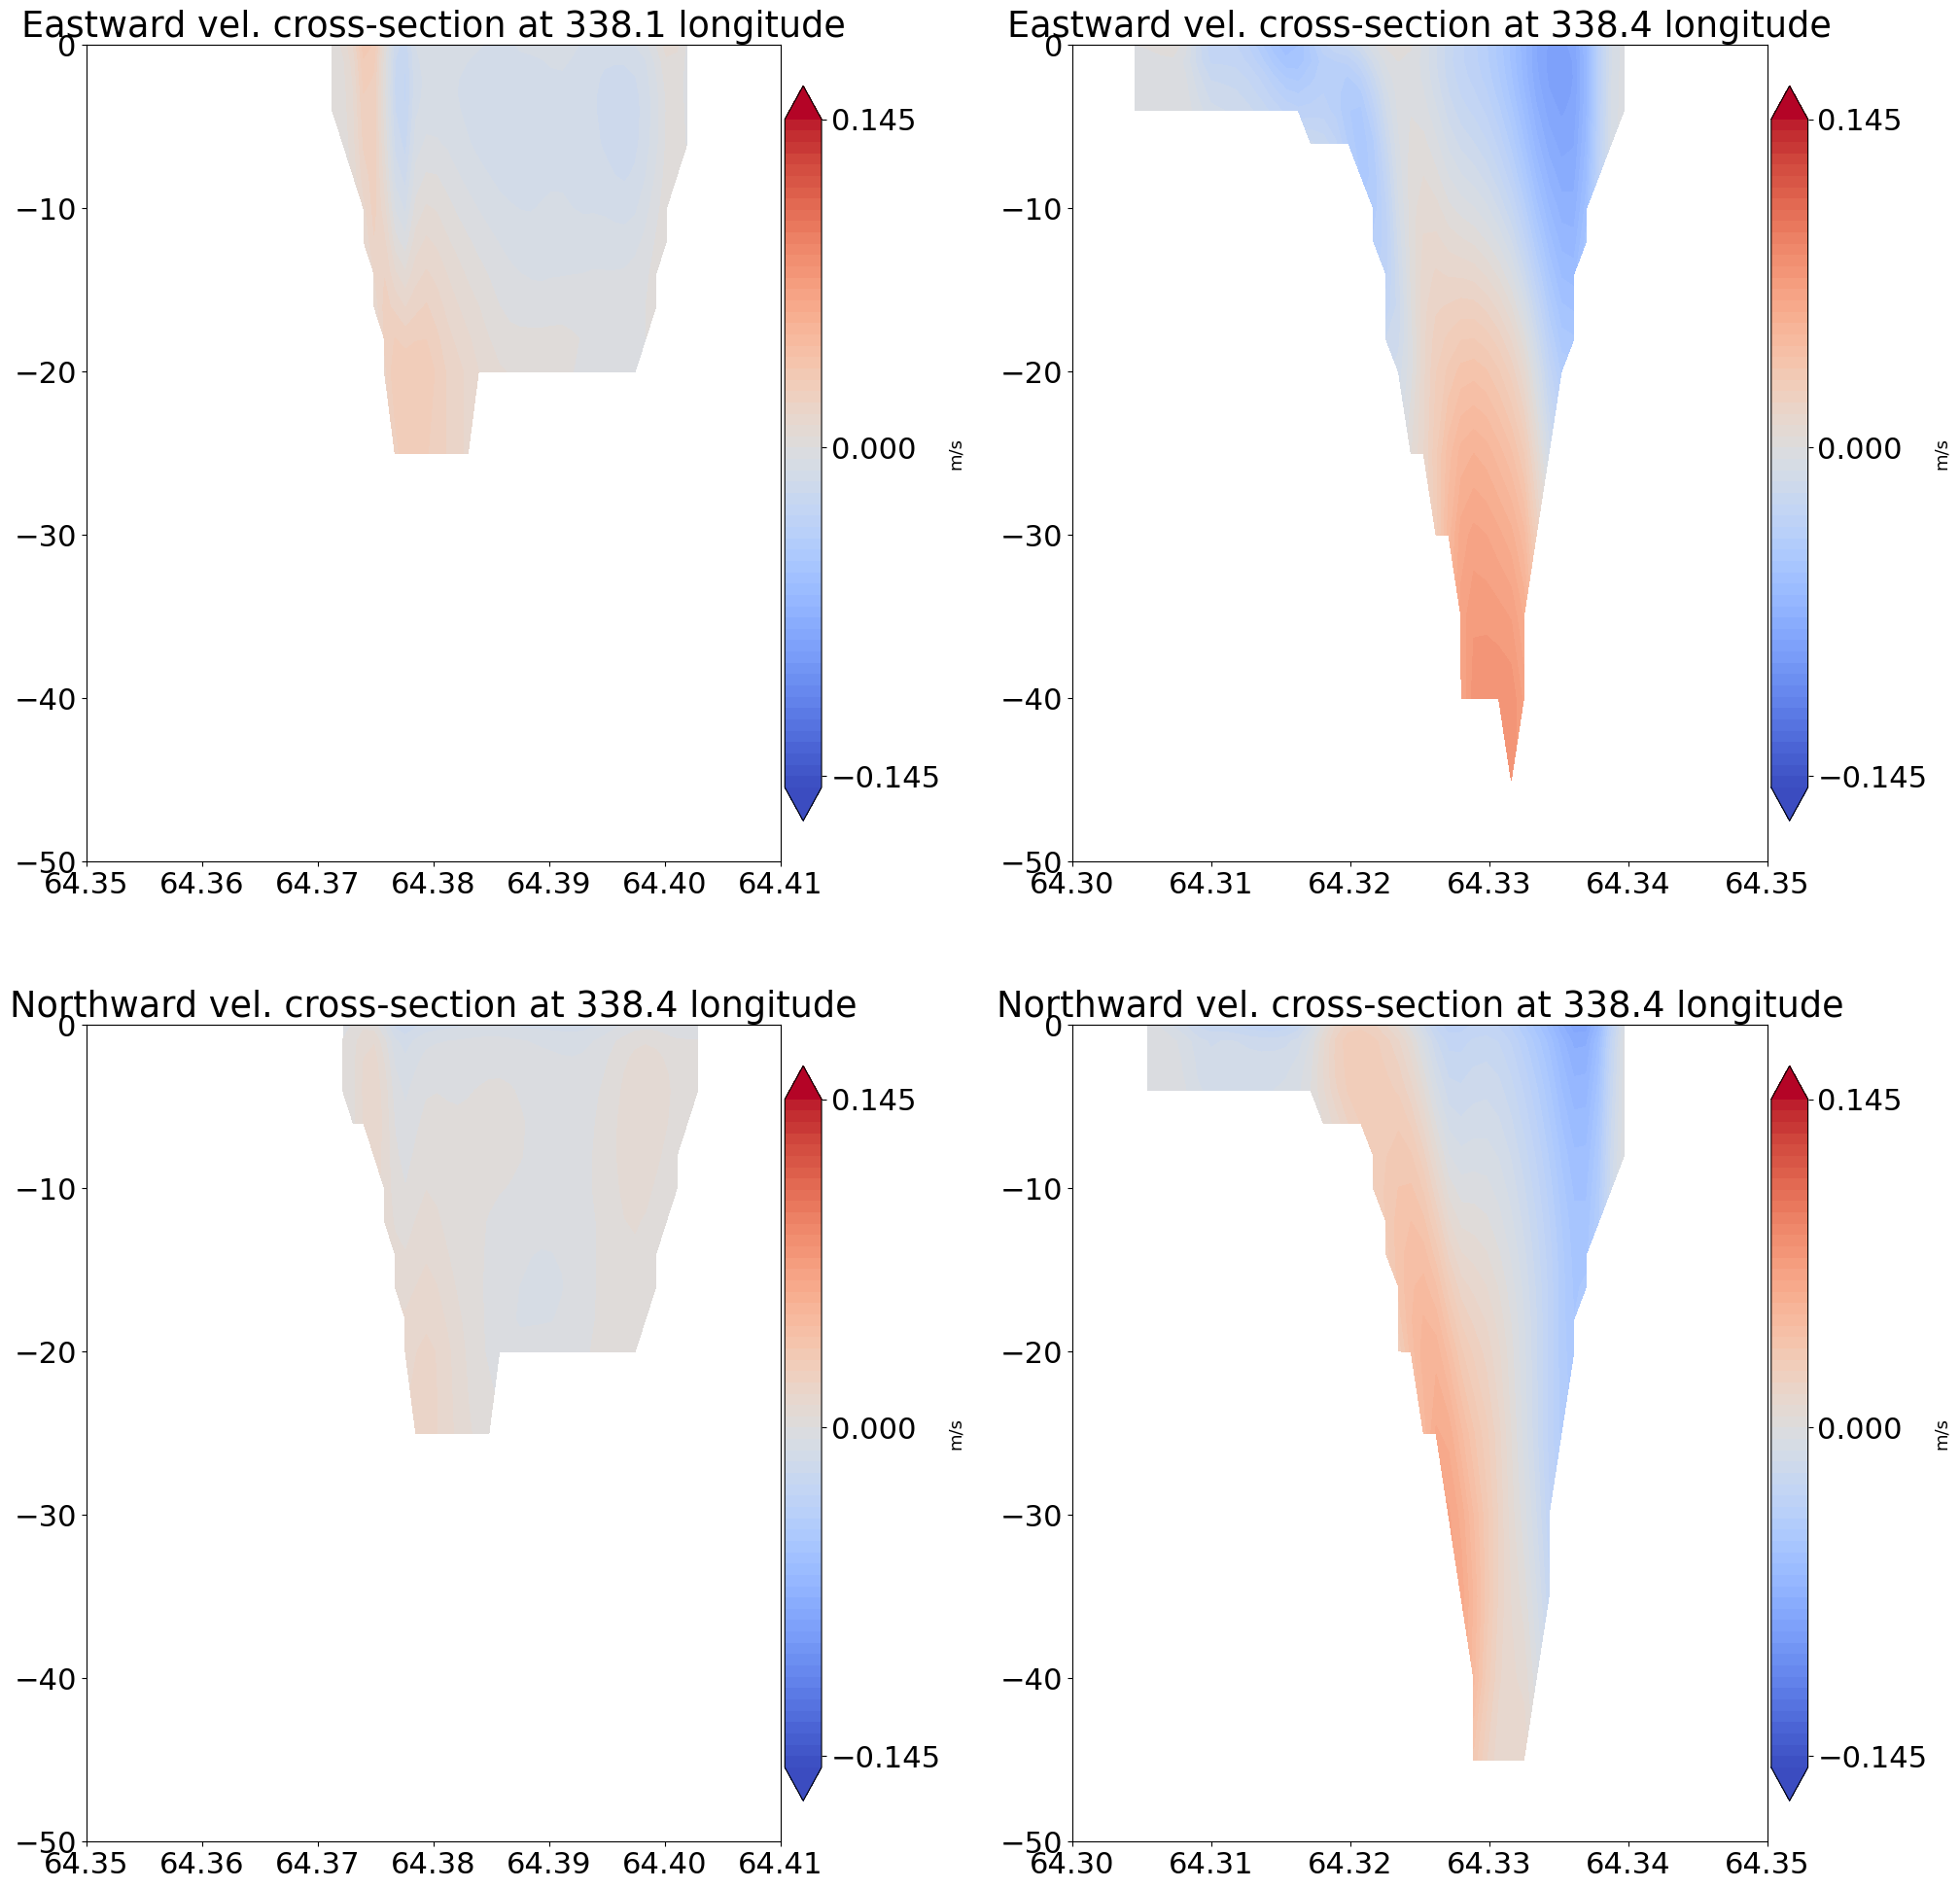

In [8]:
from matplotlib.collections import LineCollection
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(8*3, 8*3))
axlist = axarr.flatten()
k1=-0.15
k2=0.15
k3=0.005
levels = np.arange(k1, k2, k3)
cmap='coolwarm'
cf1=axlist[0].contourf(u.lat,u.depth,u.sel(lon=338.4, method='nearest'),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2)
cb1 = fig.colorbar(cf1, ax=axlist[0], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
cb1.set_label('m/s', fontsize=13)
axlist[0].set_xlim([64.35,64.41])
axlist[0].set_ylim([-50,0])
axlist[0].set_title('Eastward vel. cross-section at 338.1 longitude')

cf1=axlist[1].contourf(u.lat,u.depth,u.sel(lon=338.2, method='nearest'),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2)
cb1 = fig.colorbar(cf1, ax=axlist[1], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
cb1.set_label('m/s', fontsize=13)
axlist[1].set_xlim([64.3,64.35])
axlist[1].set_ylim([-50,0])
axlist[1].set_title('Eastward vel. cross-section at 338.4 longitude')

cf1=axlist[2].contourf(u.lat,u.depth,v.sel(lon=338.4, method='nearest'),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2)
cb1 = fig.colorbar(cf1, ax=axlist[2], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
cb1.set_label('m/s', fontsize=13)
axlist[2].set_xlim([64.35,64.41])
axlist[2].set_ylim([-50,0])
axlist[2].set_title('Northward vel. cross-section at 338.4 longitude')

cf1=axlist[3].contourf(u.lat,u.depth,v.sel(lon=338.2, method='nearest'),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2)
cb1 = fig.colorbar(cf1, ax=axlist[3], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
cb1.set_label('m/s', fontsize=13)
axlist[3].set_xlim([64.3,64.35])
axlist[3].set_ylim([-50,0])
axlist[3].set_title('Northward vel. cross-section at 338.4 longitude')

#cf1=axlist[4].plot(den.sel(lon=slice(338.15,338.25)).mean('lon').sel(lat=slice(64.31,64.333)).mean('lat'), den.depth)
##cf1=axlist[2].plot(den.sel(lon=338,lat=64.28, method='nearest'))
#axlist[4].set_title('Profile at 338.2 longitude')
#axlist[4].set_ylabel('depth in m')
#axlist[4].set_xlabel('kg/m$^3$')

#cf1=axlist[5].contourf(den.lat,t.depth,den.sel(lon=338.2, method='nearest'),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2)
#cb1 = fig.colorbar(cf1, ax=axlist[5], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
#cb1.set_label('kg/m$^3$', fontsize=13)
#axlist[5].set_title('Density cross-section at 338.2 longitude')
#axlist[5].set_xlim([64.3,64.35])
#axlist[5].set_ylim([-40,0])

## Zoomed in Plots of Upper Fjord

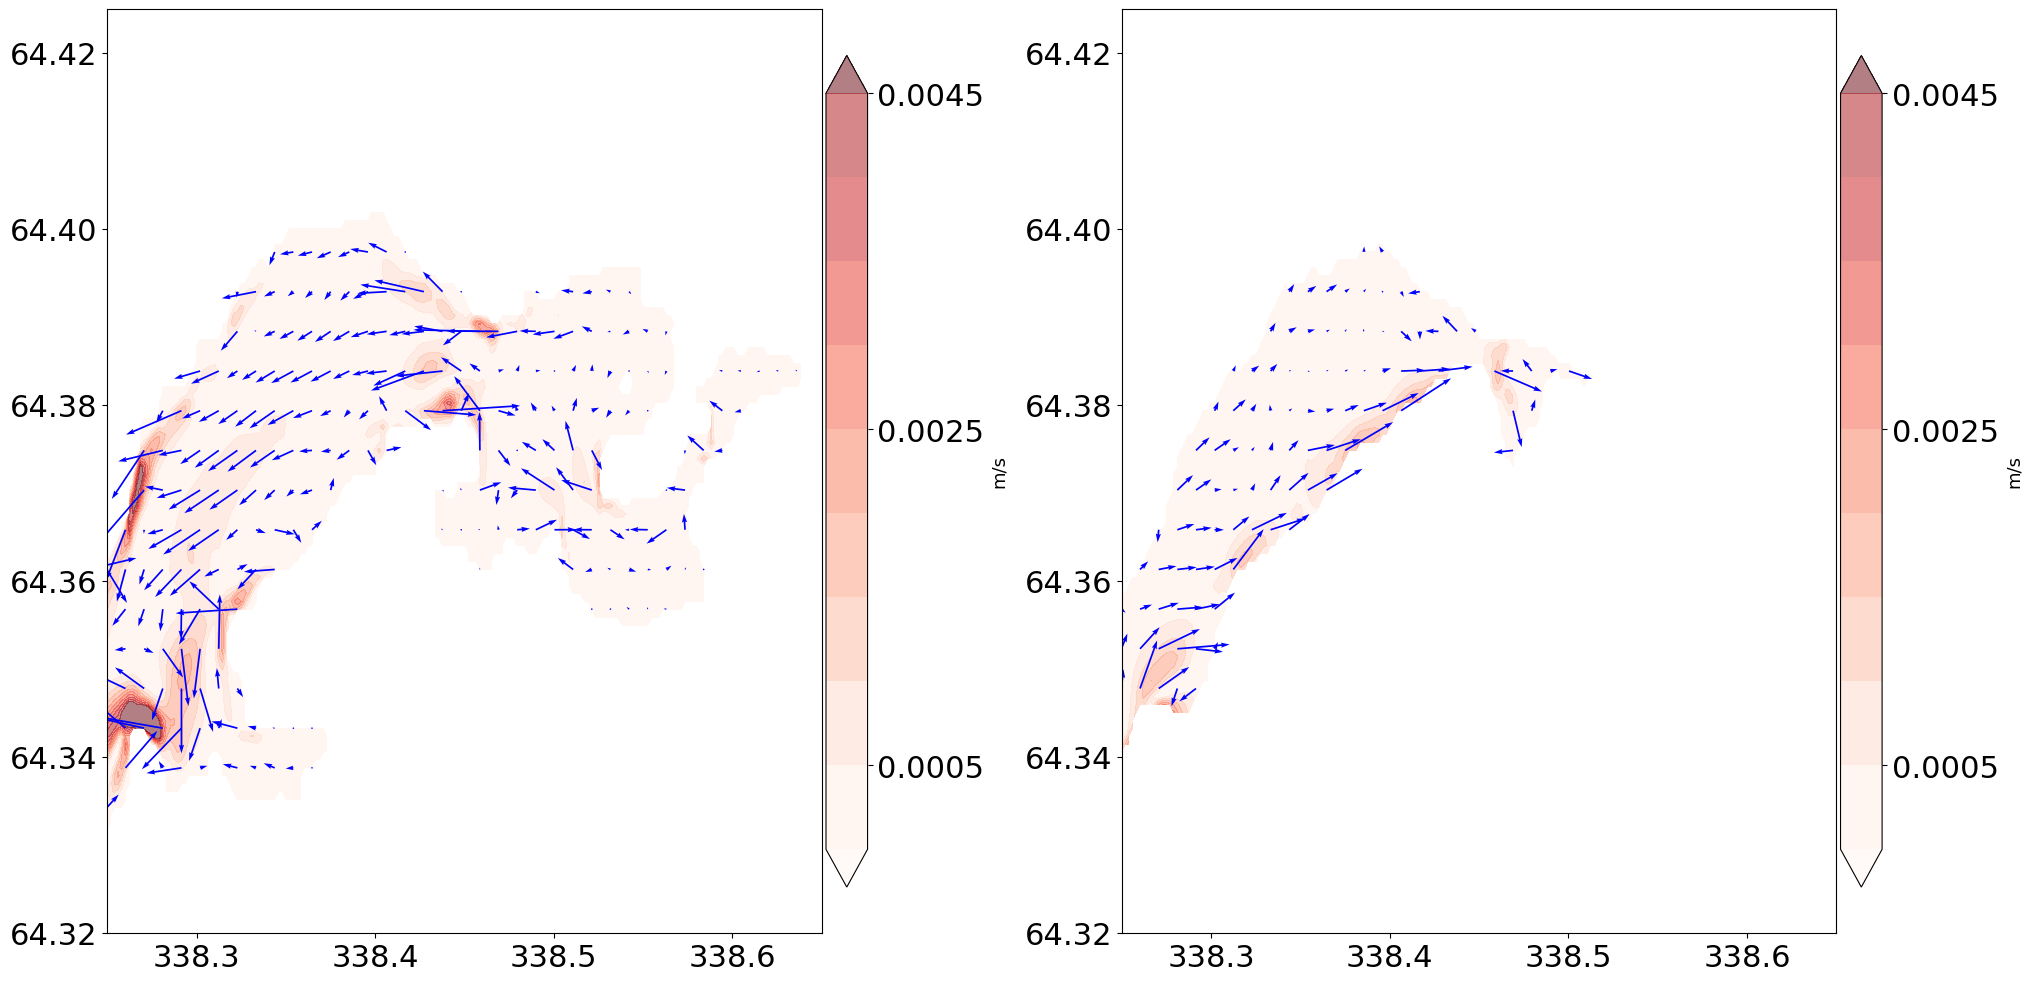

In [11]:
k1=0
k2=0.005
k3=0.0005
cmap = 'Reds'
#k1=5
#k2=10
#k3=0.5

#k3=0.5
plt.rcParams['hatch.linewidth'] = 0.4
levels = np.arange(k1, k2, k3)

from matplotlib.collections import LineCollection
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(8*3, 4*3))
axlist = axarr.flatten()

cf1=axlist[0].contourf(speed.lon,speed.lat,speed.sel(depth=-2),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2,alpha=0.5)
cf2=axlist[0].quiver(v.lon[::5],u.lat[::5],u.sel(depth=-2,method='nearest')[::5,::5],v.sel(depth=-2,method='nearest')[::5,::5],color='blue', scale=0.5)
axlist[0].set_xlim(338.25,338.65)
axlist[0].set_ylim(64.32,64.425)
cb1 = fig.colorbar(cf1, ax=axlist[0], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
cb1.set_label('m/s', fontsize=13)

cf1=axlist[1].contourf(speed.lon,speed.lat,speed.sel(depth=-20),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2,alpha=0.5)
cf2=axlist[1].quiver(v.lon[::5],u.lat[::5],u.sel(depth=-20,method='nearest')[::5,::5],v.sel(depth=-20,method='nearest')[::5,::5],color='blue', scale=0.5)
axlist[1].set_xlim(338.25,338.65)
axlist[1].set_ylim(64.32,64.425)
cb1 = fig.colorbar(cf1, ax=axlist[1], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
cb1.set_label('m/s', fontsize=13)